## Aproximando o valor de Pi com Monte Carlo

É possível aproximar o valor de pi utilizando números aleatórios, em uma abordagem que se utiliza do método de [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method).

A ideia é bem simples: desenhamos uma circunferência inscrita em um quadrado de lado $L$. 

De fato, a área do quadrado é $A_q = L^2$;

E a área do círculo é $A_c = \pi r^2 = \pi L^2/4$ (note que, sendo o círculo inscrito ao quadrado, temos que seu raio é a metade do lado, isto é, $r = L/2$).

Desta forma, temos que:

$$A_c = \frac{\pi}{4}L^2 = \frac{\pi}{4} \left ( A_q \right ) = \frac{A_q}{4} \pi \Rightarrow $$

$$\frac{4}{A_q}\left ( A_c \right ) = \pi \Rightarrow $$

$$\boxed{\pi = 4 \frac{A_c}{A_q}}$$

Ou seja, se tivermos a razão entre a área do círculo e a área do quadrado, e multiplicarmos esta razão por 4, teremos o valor de $\pi$!

A ideia do algoritmo de Monte Carlo é a seguinte: aproximar a razão $\frac{A_c}{A_q}$ utilizando números aleatórios!

Vamos sortear um par de números aleatórios $(x, y)$ dentro da região $[0, 1] \times [0, 1]$. Ou seja, $x \in [0, 1]$ será um número aleatório sorteado, bem como $y \in [0, 1]$ (isso corresponde a pegarmos um quadrado de lado $L=1$ como o espaço amostral para o par $(x, y)$).

A equação que define a região interna da circunferência (de raio $r=0.5$), que é centrada no ponto $(0.5, 0.5)$ (desenhe pra enxergar isso!) é dada por:

$(x-0.5)^2 + (y-0.5)^2 < 0.5^2$

Por tanto, se o ponto sorteado $(x, y)$ for tal que satisfaz a inequação acima, sabemos que ele está no interior da circunferência! Por outro lado, se tivermos:

$(x-0.5)^2 + (y-0.5)^2 > 0.5^2$ , 

temos que o ponto sorteado está na região externa à circunferência (mas, garantidamente dentro do quadrado, dado o espaço amostral de $x$ e $y$!

Assim, note que os pontos que caem nesta região externa ($(x-0.5)^2 + (y-0.5)^2 > 0.5^2$), contribuem para a área do quadrado, mas NÃO contribuem para a área do círculo! Analogamente, os pontos que caem na região interna ($(x-0.5)^2 + (y-0.5)^2 < 0.5^2$), contribuem para ambas as áreas. 

Ou seja, no limite em que muitos pontos são sorteados, podemos aproximar $A_c$ pela quantidade de pontos que estão na região interior à circunferência, e $A_q$ por ambos os pontos dentro e fora da circunferência (ou seja, todos os pontos que são selecionados). Desta maneira, podemos aproximar $\pi$ pela seguinte relação:

$$\boxed{\pi \approx 4 \left ( \frac{\text{# pontos dentro da circunferência}}{\text{# total de pontos sorteados}} \right )}$$


In [6]:
import random

def check_interior(dentro):
    
    x, y = random.random(), random.random()

    if (x-0.5)**2 + (y-0.5)**2 <= (0.5)**2:

        dentro += 1
        
    return dentro

def pi_mc(N, step=10):
    '''
    estima pi com base em N pontos sampleados aleatoriamente
    '''
    
    dentro = 0
    
    pi_aproxs = {}
    
    for i in range(N):

        dentro = check_interior(dentro)

        # atualiza o dicionário a cada "step" iterações
        if i % step == 0 and i != 0:
            
            pi_aproxs[i] = 4*dentro/i

    return pi_aproxs

In [7]:
pi_aproxs = pi_mc(10000)

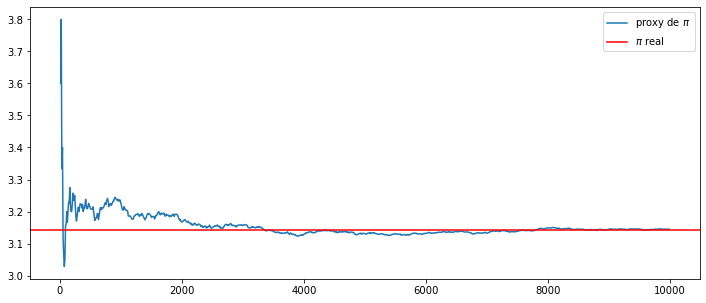

In [8]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(12, 5))

plt.plot(list(pi_aproxs.keys()), list(pi_aproxs.values()), label="proxy de $\pi$")

plt.axhline(y=math.pi, color="red", label="$\pi$ real")

plt.legend()
plt.show()